---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [2]:
def answer_one(debug=False):
    
#     # Your code here
#     fraud_df = pd.read_csv("fraud_data.csv ") 
    
#     fraud_cnt = fraud_```python
df['Class'].sum()
    
#     return fraud_cnt / fraud_df.shape[0] # Return your answer

    # Your code here
    data_frame = pd.read_csv('fraud_data.csv')
    X, y = data_frame.drop('Class', axis=1), data_frame.Class;
    
    result = len(y[y==1]) / (len(y[y==1]) + len(y[y==0]))
    
    return result # Return your answer

# answer_one(debug=True)

0.016410823768035772

In [3]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [4]:
def answer_two(debug=False):
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score, accuracy_score
    
    # Your code here
    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    # Therefore the dummy 'most_frequent' classifier always predicts class 0
    y_dummy_predictions = dummy_majority.predict(X_test)
    
    # metric scores
    dummy_acc_score = accuracy_score(y_test, y_dummy_predictions)
    dummy_recall_score = recall_score(y_test, y_dummy_predictions)
    
    return (dummy_acc_score, dummy_recall_score) # Return your answer

# answer_two(debug=True)

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [5]:
def answer_three(debug=False):
    from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
    from sklearn.svm import SVC

    # Your code here
    svm = SVC().fit(X_train, y_train)
    svm_predict = svm.predict(X_test)
    
    prec_score = precision_score(y_test, svm_predict)
    recall_score = recall_score(y_test, svm_predict)
    acc_score = accuracy_score(y_test, svm_predict)
    
    if debug:
        print(classification_report(y_test, svm_predict, target_names=['Neg', 'Post']))
    
    return (acc_score, recall_score, prec_score)  # Return your answer

# answer_three(debug=False)

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [34]:
def answer_four():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svm = SVC(kernel='rbf', C=1e9, gamma=1e-07).fit(X_train, y_train)
    
    y_scores = svm.decision_function(X_test) > -220
    # step 3-get y_predict using the decision function on X_test not using predict
    # so y_predict will contain large negative numbers, using broadcasting , 
    # y_predict_threshold = y_predict>threshold.
    # y_pred =svc.predict(X_test)>-220 
    # -> you'd need to use decision_function also y_pred needs to have 2 distinct values (0 or 1).
    confusion = confusion_matrix(y_test, y_scores)
    
    return confusion # Return your answer

# answer_four()

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

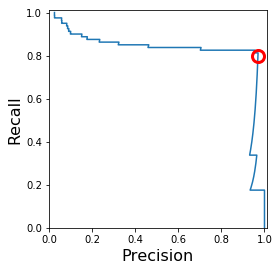

Precision 	 Recall:
(0.758621, 0.825000)
(0.767442, 0.825000)
(0.776471, 0.825000)
(0.785714, 0.825000)
(0.795181, 0.825000)
(0.804878, 0.825000)
(0.814815, 0.825000)
(0.825000, 0.825000)
(0.835443, 0.825000)
(0.846154, 0.825000)


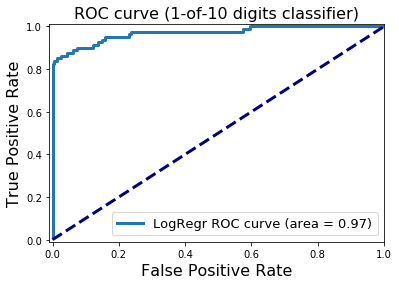

ROC Curve around 0.16
(0.148578, 0.925000)
(0.148578, 0.937500)
(0.159618, 0.937500)
(0.159618, 0.950000)
(0.204716, 0.950000)
(0.205277, 0.950000)
(0.216879, 0.950000)
(0.217253, 0.950000)


(0.825, 0.944)

In [6]:
def answer_five(debug=False):
    
    # Your code here
    from sklearn.linear_model import LogisticRegression
    
    lr = LogisticRegression().fit(X_train, y_train).decision_function(X_test)
    
    def precision_recall():
        """Plot Precision-Recall Curve to view the result with Precision=0.8"""
        from sklearn.metrics import precision_recall_curve
        import matplotlib.pyplot as plt
        
        precision, recall, thresholds = precision_recall_curve(y_test, lr)
        closest_zero = np.argmin(np.abs(thresholds))
        closest_zero_p = precision[closest_zero]
        closest_zero_r = recall[closest_zero]

        plt.figure()
        plt.xlim([0.0, 1.01])
        plt.ylim([0.0, 1.01])
        plt.plot(precision, recall, label='Precision-Recall Curve')
        plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
        plt.xlabel('Precision', fontsize=16)
        plt.ylabel('Recall', fontsize=16)
        plt.axes().set_aspect('equal')
        plt.show()
        
        print("Precision \t Recall:")
        for cnt in range(len(precision)):
            if 0.75 < precision[cnt] < 0.85:
                print("({:.6f}, {:.6f})".format(precision[cnt], recall[cnt]))
        
        return None
    
    def roc_curve():
        from sklearn.metrics import roc_curve, auc
        import matplotlib.pyplot as plt
        
        fpr_lr, tpr_lr, _ = roc_curve(y_test, lr)
        roc_auc_lr = auc(fpr_lr, tpr_lr)

        plt.figure()
        plt.xlim([-0.01, 1.00])
        plt.ylim([-0.01, 1.01])
        plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
        plt.xlabel('False Positive Rate', fontsize=16)
        plt.ylabel('True Positive Rate', fontsize=16)
        plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
        plt.legend(loc='lower right', fontsize=13)
        plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
        plt.show()
        
        print("ROC Curve around 0.16")
        for idx in range(len(fpr_lr)):
            if 0.14 < fpr_lr[idx] < 0.22:
                print("({:.6f}, {:.6f})".format(fpr_lr[idx], tpr_lr[idx]))
        
    if debug:
        import matplotlib.pyplot as plt
        
        precision_recall()
        roc_curve()
    
    return (0.825, 0.944) # Return your answer

# answer_five(debug=True)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [8]:
def answer_six(debug=False):    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression

    # Your code here
    from sklearn.linear_model import LogisticRegression
    
    lr = LogisticRegression().fit(X_train, y_train)
    
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}

    grid_clf_custom = GridSearchCV(lr, param_grid=grid_values, scoring='recall')
    grid_clf_custom.fit(X_train, y_train)

    predicted = grid_clf_custom.predict(X_test)

    if debug:
        print('Grid best parameter (max. recall): ', grid_clf_custom.best_params_)
        print('Grid best score (recall): ', grid_clf_custom.best_score_)
        print("CV Results: \n{}".format(grid_clf_custom.cv_results_))
        print("\n\n")
    
    return np.reshape(grid_clf_custom.cv_results_['mean_test_score'], (5, 2)) # Return your answer

# answer_six(debug=True)

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.8115942 ]])

<IPython.core.display.Javascript object>


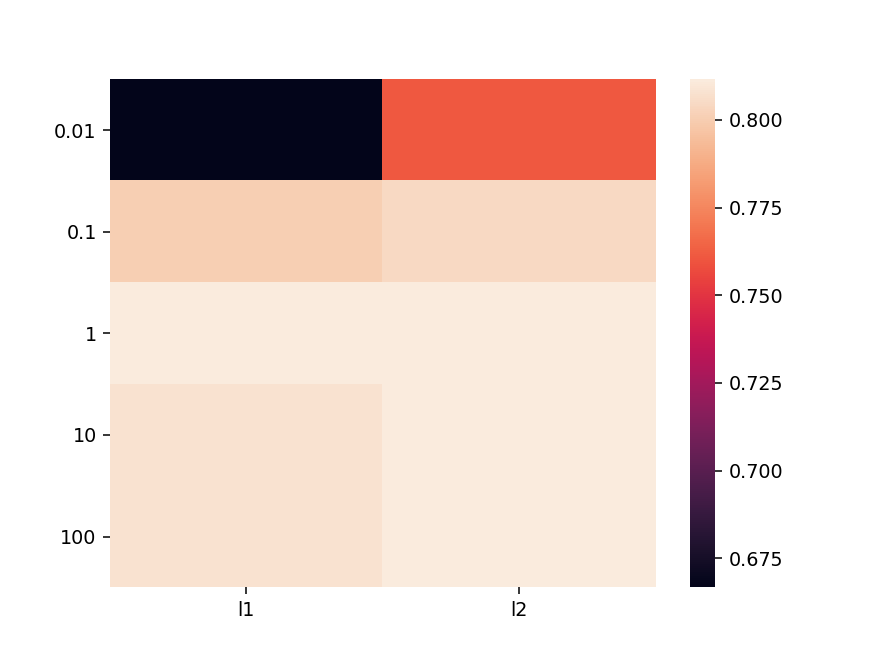

In [9]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())